In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
from PIL import Image

In [2]:

def get_actual_angle(image_number, data_file="data.txt"):
    """Get the actual steering angle from data.txt"""
    try:
        with open(data_file, 'r') as f:
            for line in f:
                img_name, angle = line.strip().split()
                if img_name == f"{image_number}.jpg":
                    return float(angle)
    except Exception as e:
        print(f"Error reading angle for image {image_number}: {e}")
    return None

In [3]:
def predict_steering_angle(image_path, model):
    """Predict steering angle using the loaded model"""
    try:
        img = Image.open(image_path)
        img = img.resize((200, 66))
        img_array = np.array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        prediction = model.predict(img_array, verbose=0)[0][0]
        return prediction
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None


In [4]:
# Load the model
model = tf.keras.models.load_model('steering_model.keras')

Processing images...


Processing images: 100%|██████████| 44999/44999 [7:23:05<00:00,  1.69it/s]   


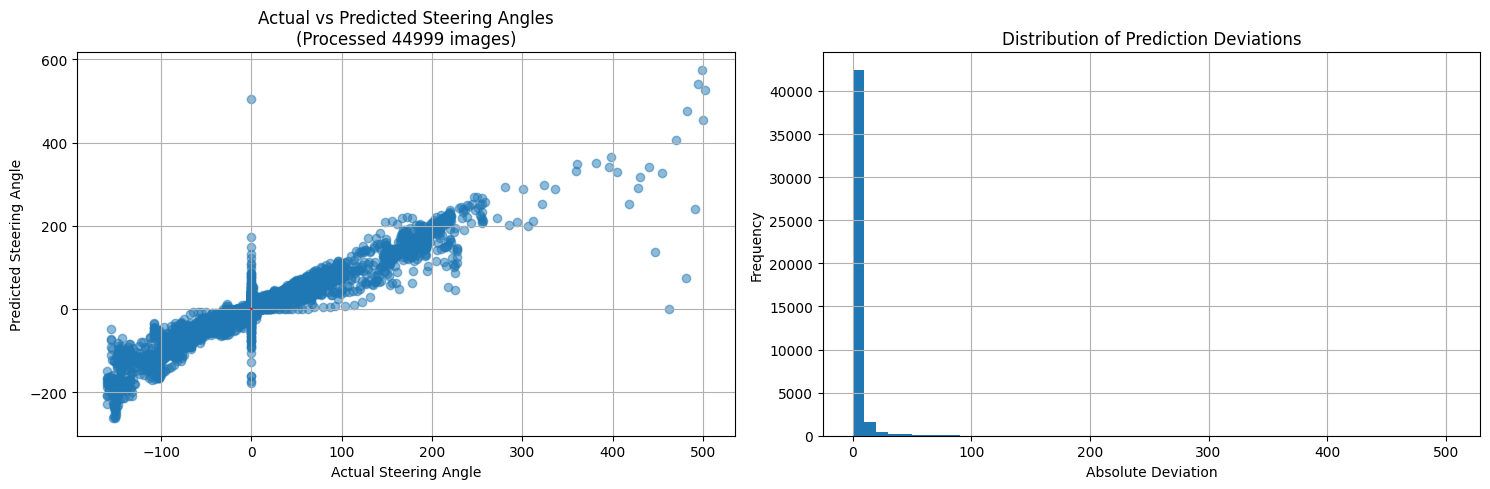


Total images processed successfully: 44999
Maximum deviation: 503.5538
Image with maximum deviation: 283.jpg
Actual angle: 0.0000
Predicted angle: 503.5538
Mean absolute deviation: 3.4818
Median absolute deviation: 1.5592


In [5]:
actual_angles = []
predicted_angles = []
deviations = []

# Process images with better error handling
print("Processing images...")
for i in tqdm(range(1, 45000), desc="Processing images"):
    image_path = f"driving_dataset/{i}.jpg"
    try:
        actual = get_actual_angle(i)
        predicted = predict_steering_angle(image_path, model)
        
        if actual is not None and predicted is not None:
            actual_angles.append(actual)
            predicted_angles.append(predicted)
            deviations.append(abs(actual - predicted))
    except Exception as e:
        print(f"\nError processing image {i}: {e}")
        continue

# Check if we have any valid predictions
if len(deviations) == 0:
    print("No valid predictions were made.")
    exit()

# Calculate statistics
max_deviation = max(deviations)
max_deviation_idx = deviations.index(max_deviation)

# Plotting
plt.figure(figsize=(15, 5))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(actual_angles, predicted_angles, alpha=0.5)
plt.plot([-1, 1], [-1, 1], 'r--')  # Perfect prediction line
plt.xlabel("Actual Steering Angle")
plt.ylabel("Predicted Steering Angle")
plt.title(f"Actual vs Predicted Steering Angles\n(Processed {len(actual_angles)} images)")
plt.grid(True)

# Deviation histogram
plt.subplot(1, 2, 2)
plt.hist(deviations, bins=50)
plt.xlabel("Absolute Deviation")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Deviations")
plt.grid(True)

plt.tight_layout()
plt.show()

# Print statistics
print(f"\nTotal images processed successfully: {len(actual_angles)}")
print(f"Maximum deviation: {max_deviation:.4f}")
print(f"Image with maximum deviation: {max_deviation_idx + 1}.jpg")
print(f"Actual angle: {actual_angles[max_deviation_idx]:.4f}")
print(f"Predicted angle: {predicted_angles[max_deviation_idx]:.4f}")
print(f"Mean absolute deviation: {np.mean(deviations):.4f}")
print(f"Median absolute deviation: {np.median(deviations):.4f}")
